# 从网络下载图像，做Canny 边缘检测后保存

In [1]:
import cv2
import numpy as np
import requests
import io

# 下载图片
url = 'https://th.bing.com/th/id/OIP.2MaWvr94eGVEN1yLHBltqgHaE7?pid=ImgDet&rs=1'
response = requests.get(url)
image = np.asarray(bytearray(response.content), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)

# 保存原始图片
cv2.imwrite('image.jpg', image)

# 使用Canny边缘检测
edges = cv2.Canny(image, threshold1=30, threshold2=100)

# 保存图像
cv2.imwrite('edges.jpg', edges)

True

# 处理前后对比

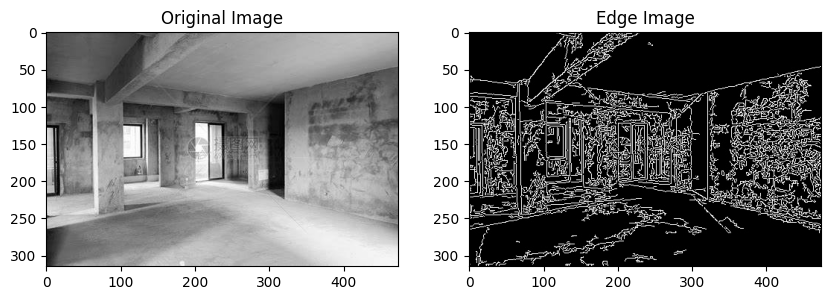

In [2]:
import matplotlib.pyplot as plt

# 读取原图
original = cv2.imread('image.jpg', cv2.IMREAD_COLOR)

# 读取处理后的图像
edges = cv2.imread('edges.jpg', cv2.IMREAD_COLOR)

# OpenCV使用BGR模式，而matplotlib使用RGB模式，所以我们需要转换颜色模式
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

# 创建子图来展示对比
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 展示原图
axs[0].imshow(original, cmap='gray')
axs[0].set_title('Original Image')

# 展示处理后的图像
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Edge Image')

# 显示图像
plt.show()

# Prompt

In [3]:
# 请为我的别墅装修，淡蓝色的海洋风格，墙壁上画满了栩栩如生的海洋生物！

# 环境配置

In [4]:
!pip3 install openmim
!mim install 'mmcv>=2.0.0'
!mim install 'mmengine'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 32.6 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.3.0
    Uninstalling platformdirs-3.3.0:
      Successfully uninstalled platformdirs-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html


In [5]:
!git clone https://github.com/open-mmlab/mmagic.git
%cd mmagic
!pip3 install -e .

Cloning into 'mmagic'...
remote: Enumerating objects: 25636, done.
remote: Counting objects: 100% (3600/3600), done.
remote: Compressing objects: 100% (1572/1572), done.
remote: Total 25636 (delta 2011), reused 3200 (delta 1975), pack-reused 22036
Receiving objects: 100% (25636/25636), 21.60 MiB | 16.44 MiB/s, done.
Resolving deltas: 100% (17169/17169), done.
/content/mmagic
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmagic
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.0/31.0 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.0/231.0 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 8.0 MB/s eta 0:00:00
     ━━

# 导入工具包

In [6]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

# 载入ControlNet模型

In [7]:
cfg = Config.fromfile('configs/controlnet/controlnet-canny.py')
controlnet = MODELS.build(cfg.model).cuda()

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/15 13:53:40 - mmengine - INFO - Set model dtype to 'torch.float32'.


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


06/15 13:54:56 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


/content/mmagic/mmagic/models/archs/wrapper.py:149: FutureWarning: Accessing config attribute `block_out_channels` directly via 'AutoencoderKL' object attribute is deprecated. Please access 'block_out_channels' over 'AutoencoderKL's config object instead, e.g. 'unet.config.block_out_channels'.
  return getattr(self.model, name)
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Do not support Xformers. Please install Xformers first. The program will run without Xformers.


06/15 13:55:25 - mmengine - INFO - Set model dtype to 'torch.float32'.
Do not support Xformers. Please install Xformers first. The program will run without Xformers.


# 输入Canny边缘图

In [8]:
# control_url = 'https://user-images.githubusercontent.com/28132635/230288866-99603172-04cb-47b3-8adb-d1aa532d1d2c.jpg'
control_img = mmcv.imread('/content/edges.jpg')
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)

# 咒语Prompt

In [9]:
prompt = 'Please decorate my cottage in a pale blue marine style, with walls painted with lifelike sea creatures!'

# 执行预测

In [10]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'control_{idx}.png')

/content/mmagic/mmagic/models/archs/wrapper.py:149: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  return getattr(self.model, name)
100%|██████████| 20/20 [00:15<00:00,  1.28it/s]


# 结果展示

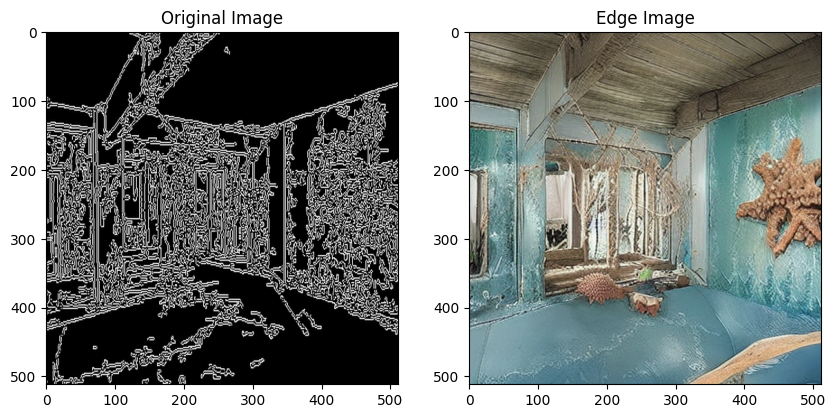

In [11]:
import matplotlib.pyplot as plt
import cv2

# 以彩色模式读取图片
original = cv2.imread('/content/mmagic/control_0.png', cv2.IMREAD_COLOR)
edges = cv2.imread('/content/mmagic/sample_0.png', cv2.IMREAD_COLOR)

# OpenCV使用BGR模式，而matplotlib使用RGB模式，所以我们需要转换颜色模式
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

# 创建子图来展示对比
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 展示原图
axs[0].imshow(original)
axs[0].set_title('Original Image')

# 展示处理后的图像
axs[1].imshow(edges)
axs[1].set_title('Edge Image')

# 显示图像
plt.show()